<a href="https://colab.research.google.com/github/YugankDabas/Plant_Disease_Prediction/blob/main/Plant_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
# Importing the dependencies
import os
import json
from zipfile import ZipFile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import google.colab

In [5]:
os.makedirs("/root/.kaggle/", exist_ok=True)

In [6]:
!cp /content/drive/MyDrive/cnn_learn/kaggle_API_credentials/kaggle.json ~/.kaggle/kaggle.json
!kaggle datasets download yugankdabas/plant-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/yugankdabas/plant-disease-dataset
License(s): unknown
 98% 1.05G/1.07G [00:08<00:00, 259MB/s]
100% 1.07G/1.07G [00:08<00:00, 136MB/s]


In [7]:
!unzip plant-disease-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Plant Disease Dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus/b31c5bf6-8fbe-4346-a2d4-c4eb1c3a2435___YLCV_NREC 2320.JPG  
  inflating: Plant Disease Dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus/b32d9472-fd28-467c-9f93-a3c9abbc8acb___UF.GRC_YLCV_Lab 02615.JPG  
  inflating: Plant Disease Dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus/b346c83d-675f-4fb2-8627-ce4b72851ce5___UF.GRC_YLCV_Lab 01352.JPG  
  inflating: Plant Disease Dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus/b375b347-80e2-44eb-9266-602253b15d31___YLCV_GCREC 5339.JPG  
  inflating: Plant Disease Dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus/b37832aa-7585-436a-b434-b3d1a2c62c03___YLCV_GCREC 2460.JPG  
  inflating: Plant Disease Dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus/b37c4d4b-9780-43fd-934b-6a5df79560bf___UF.GRC_YLCV_Lab 02414.JPG  
  inflating: Plant Disease Dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus/b37e1706-abf7-49c1-9a4c-361b9f586b8a___UF.GRC_YL

In [8]:
# Dataset Path
base_dir = '/content/Plant Disease Dataset'

In [9]:
# Image Parameters
img_size = 256
batch_size = 32

In [10]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [11]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 56246 images belonging to 38 classes.


In [12]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 14043 images belonging to 38 classes.


In [13]:
# Model Definition
model = models.Sequential()

# Block 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

# Block 2
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

# Block 3
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(38, activation='softmax'))  # 38 classes


In [15]:
# model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    67,109,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        19,494 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,223,014 (256.44 MB)

 Trainable params: 67,222,566 (256.43 MB)

 Non-trainable params: 448 (1.75 KB)

In [16]:
# Compile the Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

optimizer = Adam(learning_rate=1e-4)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-6
)


In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

checkpoint = ModelCheckpoint('disease_model.h5', monitor='val_accuracy', save_best_only=True)


In [18]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=33,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stop, lr_scheduler, checkpoint]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/33
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.3438 - loss: 2.8721

1758/1758 ━━━━━━━━━━━━━━━━━━━━ 207s 111ms/step - accuracy: 0.3438 - loss: 2.8717 - val_accuracy: 0.6955 - val_loss: 1.1064 - learning_rate: 1.0000e-04
Epoch 2/33
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.6194 - loss: 1.3948

1758/1758 ━━━━━━━━━━━━━━━━━━━━ 191s 109ms/step - accuracy: 0.6194 - loss: 1.3948 - val_accuracy: 0.8068 - val_loss: 0.6564 - learning_rate: 1.0000e-04
Epoch 3/33
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.7109 - loss: 1.0161

1758/1758 ━━━━━━━━━━━━━━━━━━━━ 196s 111ms/step - accuracy: 0.7110 - loss: 1.0161 - val_accuracy: 0.8690 - val_loss: 0.4437 - learning_rate: 1.0000e-04
Epoch 4/33
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.7734 - loss: 0.7661

1758/1758 ━━━━━━━━━━━━━━━━━━━━ 193s 109ms/step - accuracy: 0.7734 - loss: 0.7661 - val_accuracy: 0.8757 - val_loss: 0.4446 - learning_rate: 1.0000e-04
Epoch 5/33
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8140 - loss: 0.6253

1758/1758 ━━━━━━━━━━━━━━━━━━━━ 243s 138ms/step - accuracy: 0.8140 - loss: 0.6253 - val_accuracy: 0.9052 - val_loss: 0.3402 - learning_rate: 1.0000e-04
Epoch 6/33
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 207s 107ms/step - accuracy: 0.8459 - loss: 0.5069 - val_accuracy: 0.8950 - val_loss: 0.3671 - learning_rate: 1.0000e-04
Epoch 7/33
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 171s 97ms/step - accuracy: 0.8689 - loss: 0.4297 - val_accuracy: 0.8298 - val_loss: 0.6477 - learning_rate: 1.0000e-04
Epoch 8/33
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8820 - loss: 0.3946

1758/1758 ━━━━━━━━━━━━━━━━━━━━ 197s 112ms/step - accuracy: 0.8820 - loss: 0.3945 - val_accuracy: 0.9085 - val_loss: 0.3372 - learning_rate: 1.0000e-04
Epoch 9/33
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9010 - loss: 0.3274

1758/1758 ━━━━━━━━━━━━━━━━━━━━ 215s 122ms/step - accuracy: 0.9010 - loss: 0.3274 - val_accuracy: 0.9230 - val_loss: 0.2886 - learning_rate: 1.0000e-04
Epoch 10/33
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9103 - loss: 0.2996

1758/1758 ━━━━━━━━━━━━━━━━━━━━ 204s 116ms/step - accuracy: 0.9103 - loss: 0.2996 - val_accuracy: 0.9386 - val_loss: 0.2327 - learning_rate: 1.0000e-04
Epoch 11/33
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 226s 96ms/step - accuracy: 0.9221 - loss: 0.2502 - val_accuracy: 0.9386 - val_loss: 0.2248 - learning_rate: 1.0000e-04
Epoch 12/33
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9313 - loss: 0.2217

1758/1758 ━━━━━━━━━━━━━━━━━━━━ 196s 111ms/step - accuracy: 0.9313 - loss: 0.2217 - val_accuracy: 0.9409 - val_loss: 0.2184 - learning_rate: 1.0000e-04
Epoch 13/33
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9348 - loss: 0.2154

1758/1758 ━━━━━━━━━━━━━━━━━━━━ 192s 109ms/step - accuracy: 0.9348 - loss: 0.2154 - val_accuracy: 0.9422 - val_loss: 0.2350 - learning_rate: 1.0000e-04
Epoch 14/33
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 169s 96ms/step - accuracy: 0.9408 - loss: 0.2032 - val_accuracy: 0.9019 - val_loss: 0.6057 - learning_rate: 1.0000e-04
Epoch 15/33
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9453 - loss: 0.1821
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 171s 97ms/step - accuracy: 0.9453 - loss: 0.1821 - val_accuracy: 0.9267 - val_loss: 0.3203 - learning_rate: 1.0000e-04
Epoch 16/33
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9585 - loss: 0.1320

1758/1758 ━━━━━━━━━━━━━━━━━━━━ 222s 109ms/step - accuracy: 0.9585 - loss: 0.1320 - val_accuracy: 0.9442 - val_loss: 0.2577 - learning_rate: 5.0000e-05
Epoch 17/33
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9636 - loss: 0.1119

1758/1758 ━━━━━━━━━━━━━━━━━━━━ 227s 123ms/step - accuracy: 0.9636 - loss: 0.1119 - val_accuracy: 0.9557 - val_loss: 0.2116 - learning_rate: 5.0000e-05
Epoch 18/33
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 216s 97ms/step - accuracy: 0.9679 - loss: 0.1017 - val_accuracy: 0.9539 - val_loss: 0.2282 - learning_rate: 5.0000e-05
Epoch 19/33
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 201s 97ms/step - accuracy: 0.9689 - loss: 0.0982 - val_accuracy: 0.9411 - val_loss: 0.3341 - learning_rate: 5.0000e-05
Epoch 20/33
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9693 - loss: 0.0981
Epoch 20: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 172s 98ms/step - accuracy: 0.9693 - loss: 0.0981 - val_accuracy: 0.9536 - val_loss: 0.2390 - learning_rate: 5.0000e-05
Epoch 21/33
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9749 - loss: 0.0762

1758/1758 ━━━━━━━━━━━━━━━━━━━━ 191s 109ms/step - accuracy: 0.9749 - loss: 0.0762 - val_accuracy: 0.9565 - val_loss: 0.2007 - learning_rate: 2.5000e-05
Epoch 22/33
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9776 - loss: 0.0709

1758/1758 ━━━━━━━━━━━━━━━━━━━━ 228s 123ms/step - accuracy: 0.9776 - loss: 0.0709 - val_accuracy: 0.9618 - val_loss: 0.1843 - learning_rate: 2.5000e-05
Epoch 23/33
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9805 - loss: 0.0609

1758/1758 ━━━━━━━━━━━━━━━━━━━━ 263s 124ms/step - accuracy: 0.9805 - loss: 0.0609 - val_accuracy: 0.9644 - val_loss: 0.1925 - learning_rate: 2.5000e-05
Epoch 24/33
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 187s 106ms/step - accuracy: 0.9812 - loss: 0.0601 - val_accuracy: 0.9638 - val_loss: 0.1827 - learning_rate: 2.5000e-05
Epoch 25/33
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 170s 97ms/step - accuracy: 0.9815 - loss: 0.0572 - val_accuracy: 0.9569 - val_loss: 0.2178 - learning_rate: 2.5000e-05
Epoch 26/33
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 169s 96ms/step - accuracy: 0.9812 - loss: 0.0563 - val_accuracy: 0.9630 - val_loss: 0.1981 - learning_rate: 2.5000e-05
Epoch 27/33
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9839 - loss: 0.0500
Epoch 27: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-05.
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 200s 95ms/step - accuracy: 0.9839 - loss: 0.0500 - val_accuracy: 0.9610 - val_loss: 0.2219 - learning_rate: 2.5000e-05
Epoch 28/33
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s

1758/1758 ━━━━━━━━━━━━━━━━━━━━ 249s 121ms/step - accuracy: 0.9827 - loss: 0.0484 - val_accuracy: 0.9655 - val_loss: 0.1844 - learning_rate: 1.2500e-05
Epoch 29/33
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 216s 95ms/step - accuracy: 0.9864 - loss: 0.0399 - val_accuracy: 0.9651 - val_loss: 0.1896 - learning_rate: 1.2500e-05


In [19]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
438/438 ━━━━━━━━━━━━━━━━━━━━ 24s 55ms/step - accuracy: 0.9652 - loss: 0.1726
Validation Accuracy: 96.38%


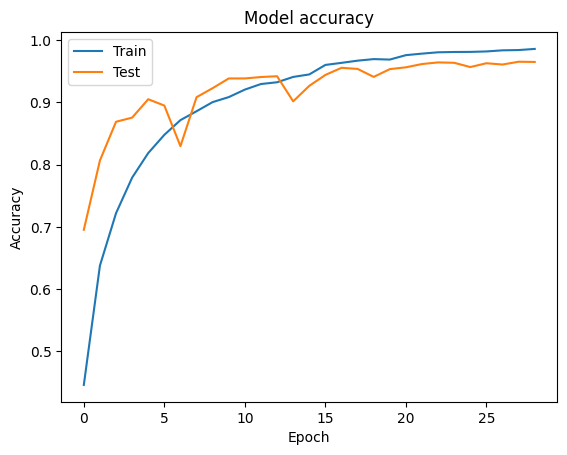

In [20]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

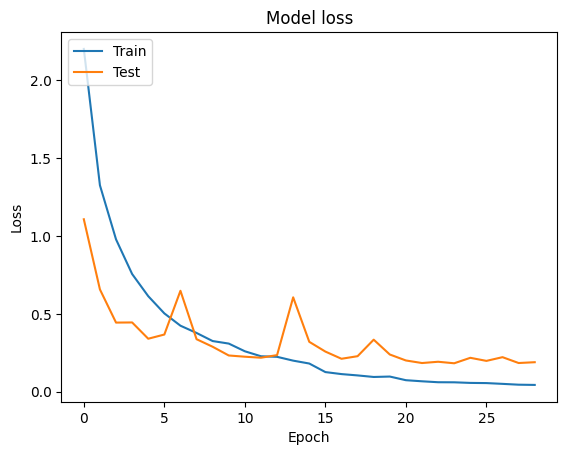

In [21]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [22]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

In [23]:
# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [24]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [25]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper__bell___Bacterial_spot',
 19: 'Pepper__bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [26]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [29]:
model.save('plant_disease_model.h5')

In [28]:
model.save('plant_disease_model.keras')